# 4.6 Lab: Logistic Regression, LDA, QDA, and KNN


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#4.6.1-The-Stock-Market-Data">The Stock Market Data</a></li>
        <li><a href="#4.6.2-Logistic-Regression">Logistic Regressionn</a></li>
        <li><a href="#4.6.3-Linear-Discriminant-Analysis">Linear Discriminant Analysis</a></li>
        <li><a href="#4.6.4-Quadratic-Discriminant-Analysis">Quadratic Discriminant Analysis</a></li>
        <li><a href="#4.6.5-K-Nearest-Neighbors">K-Nearest Neighbors</a></li>
        <li><a href="#4.6.6 An Application to Caravan Insurance Data">An Application to Caravan Insurance Data</a></li>
    </ol>
</div>


 You can download for from **[here](https://drive.google.com/file/d/1WlYoNaYCRvf7n810_q71oYNxf5XctMF5/view?usp=sharing)**

## _4.6.1 The Stock Market Data_
We start by examining the ***Smarket*** data. This data set consists of percentage returns for the S&P 500 stock index over 1, 250 days, from the beginning of 2001 until the end of 2005. For each date, we have recorded the percentage returns for each of the five previous trading days, ***Lag1*** through ***Lag5***.

We also have:

Variable | Description |
:---|:---
**Volume** | the number of shares traded on the previous day, in billions
**Today** | the percentage return on the date in question
**Direction** | whether the market was *Up* or *Down* on this date

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We import dataset and exam its content.

In [2]:
smarket = pd.read_csv('Smarket.csv')
smarket.head(3)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down


In [3]:
smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [4]:
smarket.shape

(1250, 9)

In [5]:
smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [6]:
print(smarket.describe())

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000000     0.039000     0.039000     0.038500     0.038500   
75%    2004.000000     0.596750     0.596750     0.596750     0.596750   
max    2005.000000     5.733000     5.733000     5.733000     5.733000   

             Lag5       Volume        Today  
count  1250.00000  1250.000000  1250.000000  
mean      0.00561     1.478305     0.003138  
std       1.14755     0.360357     1.136334  
min      -4.92200     0.356070    -4.922000  
25%      -0.64000     1.257400    -0.639500  
50%       0.03850     1.422950     0.038500  
75%       0

We will produce a correlation matrix using the method `.corr()`. This matrix contains all of the pairwise correlations among the predictors in the data set.

We'll also plot the correlation heatmap.

In [7]:
corr = smarket.corr()
print(corr)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000  


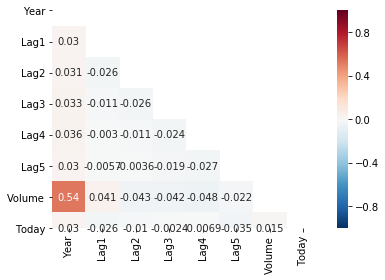

In [8]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, vmin=-1, vmax=1, mask=mask, annot=True, cmap='RdBu_r')

* We see that **Direction** was not included. This is because it's a qualitative variable with _Up_ and _Down_ values.
* As expected the correlation between the lab variables and today's returns are close to zero
* The only apparent correlation is between **Year** and **Volume**

Let's plot the data

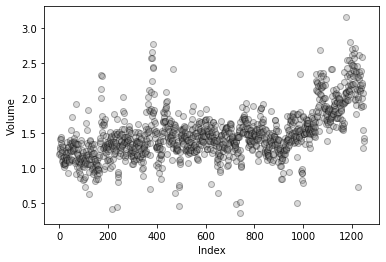

In [9]:
plt.scatter(y=smarket['Volume'], x=smarket.index.values, alpha=.3, edgecolors='black', c='grey')
plt.xlabel('Index')
plt.ylabel('Volume')
plt.show()

By plotting **Volume** we see that it's increasing over time. In other words, the average number
of shares traded daily increased from 2001 to 2005.

---------
## _4.6.2 Logistic Regression_

Next, we will fit a logistic regression model in order to predict **Direction** using **Lag1** through **Lag5** and **Volume**

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

First I convert the **Direction** variable to the binary variable. For this one, I will use `sklearn` library.

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
smarket['Direction'] = labelencoder.fit_transform(smarket['Direction'])

Next I run the logistic regression with all the available regressors

In [12]:
endog = smarket['Direction']
exog = smarket[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]

exog = sm.add_constant(exog) # I add the constant for the intercept
logit_model = sm.Logit(endog, exog, data=smarket).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sun, 19 Apr 2020   Pseudo R-squ.:                0.002074
Time:                        19:31:28   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

F:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Even though the smallest *p-value* is associated with **Lag1** none of the variables contain any statistical significance.

To access separately coefficients of the variables and their *p-values* we will use `.params` and `.pvalues`.

In [13]:
print('*** Coefficeients ***')
print(logit_model.params, '\n')
print('*** p-Values ***')
print(logit_model.pvalues, '\n')

*** Coefficeients ***
const    -0.126000
Lag1     -0.073074
Lag2     -0.042301
Lag3      0.011085
Lag4      0.009359
Lag5      0.010313
Volume    0.135441
dtype: float64 

*** p-Values ***
const     0.600700
Lag1      0.145232
Lag2      0.398352
Lag3      0.824334
Lag4      0.851445
Lag5      0.834998
Volume    0.392404
dtype: float64 



The `.predict()` function can be used to predict the probability that the market will go up, given the values of the predictors.

We will look at the first 10 entries.

In [14]:
logit_pred = logit_model.predict(exog)
logit_pred[:10]

0    0.507084
1    0.481468
2    0.481139
3    0.515222
4    0.510781
5    0.506956
6    0.492651
7    0.509229
8    0.517614
9    0.488838
dtype: float64

To make a prediction as to whether the market will go up or down on a particular day, we must convert these predicted probabilities into class labels, *Up* or *Down*.

For this one, I will create a function which will convert values less than 0.5 to _Down_ and more than 0.5 to _Up_

In [15]:
def class_predictions(pred):
    for p in pred:
        if p > 0.5:
            pred[pred == p] = 'Up'
        else:
            pred[pred == p] = 'Down'
    return pred

In [16]:
pred_direction = class_predictions(logit_pred)
print(pred_direction[:5])

0      Up
1    Down
2    Down
3      Up
4      Up
dtype: object


Given these predictions, we will plot a confusion matrix in order to determine how many observations were correctly or incorrectly classified.

In [17]:
conf_matrix = logit_model.pred_table(threshold=0.5).T
print('<<< Confusion Matrix >>>')
print('\t  Down','Up', '\nDown', '\t', conf_matrix[0], '\nUp', '\t', conf_matrix[1]) # I'm using transpose function to 

<<< Confusion Matrix >>>
	  Down Up 
Down 	 [145. 141.] 
Up 	 [457. 507.]


The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions. Hence our model correctly predicted that the market would go up on 507 days and that it would go down on 145 days, for a total of 507 + 145 = 652 correct predictions

We can further evbaluate percentage of our correct prediction by using `classification_report()` function.

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score

# For the predict values we will conver to 0 and 1
print(classification_report(smarket['Direction'], (logit_model.predict(exog) > 0.5).astype(int), digits=4))

              precision    recall  f1-score   support

           0     0.5070    0.2409    0.3266       602
           1     0.5259    0.7824    0.6290       648

    accuracy                         0.5216      1250
   macro avg     0.5165    0.5116    0.4778      1250
weighted avg     0.5168    0.5216    0.4834      1250



* We see `accuracy` is .5216 which means that logistic regression correctly predicted the movement of the market 52.2% of the time.

At first glance, it appears that the logistic regression model is working a little better than random guessing. However, this result is misleading because we trained and tested the model on the same set of 1, 250 observations. In other words, 100− 52.2 = 47.8% is the _training_ error rate.

To better assess the accuracy of the logistic regression model in this setting, we can fit the model using part of the data, and then examine how well it predicts the held-out data.

To implement this strategy, we will first split the data for training with the values from 2001 through 2004. We will then use this vector to create a held-out data set of observations from 2005.

In [19]:
X_train = smarket[smarket['Year'] < 2005]
y_train = smarket.iloc[:, -1][smarket['Year'] < 2005]
print('Train set', X_train.shape)

X_test = smarket[smarket['Year'] >= 2005]
y_test = smarket.iloc[:, -1][smarket['Year'] >= 2005]

print('Test set', X_test.shape)

Train set (998, 9)
Test set (252, 9)


We now fit a logistic regression model using only the subset of the observations that correspond to dates before 2005. Therefore we will use our train set. And then predict it on our test set.

In [20]:
full_set = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume'

In [21]:
logit01 = smf.glm(formula= full_set, data= X_train, 
                family= sm.families.Binomial()).fit()

In [22]:
print(classification_report(y_test, (logit01.predict(X_test) > 0.5).astype(int), digits=4))

              precision    recall  f1-score   support

           0     0.4425    0.6937    0.5404       111
           1     0.5641    0.3121    0.4018       141

    accuracy                         0.4802       252
   macro avg     0.5033    0.5029    0.4711       252
weighted avg     0.5106    0.4802    0.4628       252



* Our accuracy dropped to .4802 (48.02%)
* Model predict **Direction** _Up_ slightly better - 56.41%

Now our results are even worth then when we ran the model on the full data. And this is normal and it's a common practice to train the model on one part of the data set and test in on another in order not to overfit the model. We should not be surprised by this outcome as it's generally expected for a previous day not to be a determinant if a stock goes up or down in value the next day.

Previously we also saw that **Lag1** had the smallest corresponding _p-value_. The variables cause the increase in variance, without actually decreasing bias. Maybe by removing the variables that appear to be insignificant to predict the outcome, we can improve our model's accuracy.

Below we have refit the logistic regression using just **Lag1** and **Lag2**, which seemed to have the highest predictive power in the original logistic regression model.

In [23]:
two_vars = 'Direction ~ Lag1+Lag2'

In [24]:
logit02 = smf.glm(formula= two_vars, data= X_train, 
                family= sm.families.Binomial()).fit()

In [25]:
print(classification_report(y_test, (logit02.predict(X_test) > 0.5).astype(int), digits=4))

              precision    recall  f1-score   support

           0     0.5000    0.3153    0.3867       111
           1     0.5824    0.7518    0.6563       141

    accuracy                         0.5595       252
   macro avg     0.5412    0.5335    0.5215       252
weighted avg     0.5461    0.5595    0.5376       252



Now the results appear to be a little better:
* 56% of the daily movements have been correctly predicted.
* _Up_ direction even went up to 58%
* Much simpler model gave a better result

However, prediction accuracy still being so low we can conclude that the logistic regression method is no better than the naıve approach

Suppose that we want to predict the returns associated with particular values of **Lag1** and **Lag2**. In particular, we want to predict Direction on a day when **Lag1** and **Lag2** equal 1.2 and 1.1, respectively, and on a day when they equal 1.5 and −0.8.

In [26]:
lag_values = pd.DataFrame([[1.2, 1.1], 
                           [1.5, -0.8]],
                         columns= ["Lag1","Lag2"])

In [27]:
print(logit02.predict(lag_values))

0    0.479146
1    0.496094
dtype: float64


--------
## _4.6.3 Linear Discriminant Analysis_

Now we will perform *LDA* on the **Smarket** data. We can perform LDA using `sk-learn` function. We fit the model using only the observations before 2005.

In [28]:
X_train = smarket[smarket['Year'] < 2005][['Lag1','Lag2']]
y_train = smarket[smarket['Year'] < 2005]['Direction']

X_test = smarket[smarket['Year'] >= 2005][['Lag1', 'Lag2']]
y_test = smarket[smarket['Year'] >= 2005]['Direction']

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
lda_model = LDA.fit(X_train, y_train)

In [30]:
def print_model_info(model):
    print('Prior probabilities of groups :\n\tDown\tUp\n', model.priors_,'\n')
    print('Group means :\n\tLag1\tLag2\nDown', model.means_[0],
          '\nUp ', model.means_[1], '\n')

In [31]:
print_model_info(lda_model)

Prior probabilities of groups :
	Down	Up
 [0.49198397 0.50801603] 

Group means :
	Lag1	Lag2
Down [0.04279022 0.03389409] 
Up  [-0.03954635 -0.03132544] 



In [32]:
print('Coefficients:\n', lda_model.coef_)

Coefficients:
 [[-0.05544078 -0.0443452 ]]


* The LDA output indicates prior probabilities of ${\hat{\pi}}_1 = 0.492$ and ${\hat{\pi}}_2 = 0.508$; in other words, 49.2% of the training observations correspond to days during which the market went down.


* The group means -- the average of each predictor within each class used by LDA as estimates of $\mu_k$ -- suggests that there is a tendency for the previous 2 days’ returns to be negative on days when the market increases.


* The coefficients of linear discriminants output provides the linear combination of **Lag1** and **Lag2** that are used to form the LDA decision rule


* If $−0.0554\times{\tt Lag1}−0.0443\times{\tt Lag2}$ is large, then the LDA classifier will predict a market increase, and if it is small, then the LDA classifier will predict a market decline


The `.predict()` function returns a list with three elements. The first element,class, contains LDA’s predictions about the movement of the market.

In [33]:
lda_pred = lda_model.predict(X_test)

In [34]:
def conf_matrix(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred).T
    print('<<< Confusion Matrix of LDA >>>')
    print('\t  Down','Up', '\nDown',
          '\t', matrix[0], '\nUp',
          '\t', matrix[1])

In [35]:
conf_matrix(y_test, lda_pred)

<<< Confusion Matrix of LDA >>>
	  Down Up 
Down 	 [35 35] 
Up 	 [ 76 106]


Applying a 50% threshold to the posterior probabilities allows us to recreate the predictions. We can also use any other probability threshold we want.

In [36]:
pr_pred = LDA.predict_proba(X_test)

In [37]:
# 50% threshold
print('50% threshold: ', np.unique(pr_pred[:, 1] > .5, return_counts=True), '\n')

# 90% threshold
print('90% threshold: ',np.unique(pr_pred[:, 1] > .9, return_counts=True))

50% threshold:  (array([False,  True]), array([ 70, 182], dtype=int64)) 

90% threshold:  (array([False]), array([252], dtype=int64))


* With 50% threshold, we have 182 correct predictions
* No days are in 2005 meet the 90% threshold!

---------
## _4.6.4 Quadratic Discriminant Analysis_

We will now fit a *QDA* model to the **Smarket** data

In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis()
qda_model = QDA.fit(X_train, y_train)

In [39]:
# I will reuse the function for printing model details
print_model_info(qda_model)

Prior probabilities of groups :
	Down	Up
 [0.49198397 0.50801603] 

Group means :
	Lag1	Lag2
Down [0.04279022 0.03389409] 
Up  [-0.03954635 -0.03132544] 



The output contains the group means. But it does not contain the coefficients of the linear discriminants, because the QDA classifier involves a quadratic, rather than a linear, function of the predictors

We perform predictions just like with LDA using `.predict()` function

In [40]:
qda_pred = qda_model.predict(X_test)

In [41]:
conf_matrix(y_test, qda_pred)

<<< Confusion Matrix of LDA >>>
	  Down Up 
Down 	 [30 20] 
Up 	 [ 81 121]


In [42]:
print(classification_report(y_test, (qda_model.predict(X_test) > 0.5).astype(int), digits=4))

              precision    recall  f1-score   support

           0     0.6000    0.2703    0.3727       111
           1     0.5990    0.8582    0.7055       141

    accuracy                         0.5992       252
   macro avg     0.5995    0.5642    0.5391       252
weighted avg     0.5994    0.5992    0.5589       252



Interestingly, the QDA predictions are accurate almost 60% of the time, even though the 2005 data were not used to fit the model. This level of accuracy is quite impressive for stock market data, which is known to be quite hard to model accurately. This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression. However, it's recommended evaluating this method’s performance on a larger test set before betting that this approach will consistently beat the market!

------------
## _4.6.5 K-Nearest Neighbors_

We will now perform KNN using the `neighbors` function, which is part of the `scikit-learn` class library. This function works rather differently from the other model fitting functions that we have encountered thus far. Rather than a two-step approach in which we first fit the model and then we use the model to make predictions, `neighbors` form predictions using a single command. The function requires four inputs.

1. A matrix containing the predictors associated with the training data (X_train).
2. A matrix containing the predictors associated with the data for which we wish to make predictions (X_test).
3. A vector containing the class labels for the training observations, labeled below (y_train).
4. A value for _K_, the number of nearest neighbors to be used by the classifier.

As we have already split the data previously we will just go ahead and run the model

In [43]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn_pred = knn.fit(X_train, y_train).predict(X_test)

In [44]:
conf_matrix(y_test, knn_pred)

<<< Confusion Matrix of LDA >>>
	  Down Up 
Down 	 [43 58] 
Up 	 [68 83]


In [45]:
print(classification_report(y_test, knn_pred, digits=4))

              precision    recall  f1-score   support

           0     0.4257    0.3874    0.4057       111
           1     0.5497    0.5887    0.5685       141

    accuracy                         0.5000       252
   macro avg     0.4877    0.4880    0.4871       252
weighted avg     0.4951    0.5000    0.4968       252



The results using K = 1 are not very good since only 50% of the observations are correctly predicted. Of course, it may be that K = 1 results in an overly flexible fit to the data. Below, we repeat the analysis using K = 3.

In [46]:
knn1 = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn_pred1 = knn1.fit(X_train, y_train).predict(X_test)

In [47]:
conf_matrix(y_test, knn_pred1)

<<< Confusion Matrix of LDA >>>
	  Down Up 
Down 	 [48 55] 
Up 	 [63 86]


In [48]:
print(classification_report(y_test, knn_pred1, digits=4))

              precision    recall  f1-score   support

           0     0.4660    0.4324    0.4486       111
           1     0.5772    0.6099    0.5931       141

    accuracy                         0.5317       252
   macro avg     0.5216    0.5212    0.5209       252
weighted avg     0.5282    0.5317    0.5295       252



The results have improved slightly. But increasing K further turns out to provide no further improvements. It appears that for this data, QDA provides the best results of the methods that we have examined so far.

----------
## _4.6.6 An Application to Caravan Insurance Data_

Finally, we will apply the KNN approach to the **Caravan** data set. You can download data set from **[here.](https://rb.gy/pfbpzi)**

* This data set includes 85 predictors that measure demographic characteristics for 5,822 individuals.
* The response variable is **Purchase**, which indicates whether or not a given individual purchases a caravan insurance policy.
* In this data set, only 6% of people purchased caravan insurance

In [49]:
caravan = pd.read_csv('Caravan.csv')

In [50]:
caravan.shape

(5822, 86)

In [51]:
caravan['Purchase'].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

Because of that we will standardize the data so that all variables are given a mean of zero and standard deviation of one. This way all variables will be on a comparable scale.

We will use `preprocessing` from `sklearn` library.

In [52]:
from sklearn import preprocessing

y = caravan['Purchase']
X = caravan.drop('Purchase', axis=1).astype('float64')
X_scaled = preprocessing.scale(X)

Now every column of **X_scaled** has a standard deviation of one anda mean of zero.

We now split the observations into a test set, containing the first 1,000 observations, and a training set, containing the remaining observations.

In [53]:
X_train = X_scaled[1000:, :]
y_train = y[1000:]

X_test = X_scaled[:1000, :]
y_test = y[:1000]

We fit a KNN model on the training data using K = 1, and evaluate its performance on the test data

In [54]:
knn2 = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn_pred2 = knn2.fit(X_train, y_train).predict(X_test)

In [55]:
print(classification_report(y_test, knn_pred2, digits=4))

              precision    recall  f1-score   support

          No     0.9458    0.9277    0.9367       941
         Yes     0.1169    0.1525    0.1324        59

    accuracy                         0.8820      1000
   macro avg     0.5314    0.5401    0.5345      1000
weighted avg     0.8969    0.8820    0.8892      1000



* The KNN error rate on the 1,000 test observations is just under 12%.

At first glance, this may appear to be fairly good. However, since only 6% of customers purchased insurance, we could get the error rate down to 6% by always predicting No regardless of the values of the predictors!

the company would like to try to sell insurance only to customers who are likely to buy it. So the overall error rate is not of interest. Instead, the fraction of individuals that are correctly predicted to buy insurance is of interest.

In [56]:
def conf_matrix_knn(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred).T
    print('<<< Confusion Matrix of LDA >>>')
    print('\t  No','Yes', '\nNo',
          '\t', matrix[0], '\nYes',
          '\t', matrix[1])
    
conf_matrix_knn(y_test, knn_pred2)

<<< Confusion Matrix of LDA >>>
	  No Yes 
No 	 [873  50] 
Yes 	 [68  9]


KNN with K = 1 does far better than random guessing among the customers that are predicted to buy insurance. Among 77 such
customers, 9, or 11.7%, actually do purchase insurance. This is double the rate that one would obtain from random guessing.

In [57]:
knn3 = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn_pred3 = knn3.fit(X_train, y_train).predict(X_test)
conf_matrix_knn(y_test, knn_pred3)

<<< Confusion Matrix of LDA >>>
	  No Yes 
No 	 [921  54] 
Yes 	 [20  5]


In [58]:
knn4 = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_pred4 = knn4.fit(X_train, y_train).predict(X_test)
conf_matrix_knn(y_test, knn_pred4)

<<< Confusion Matrix of LDA >>>
	  No Yes 
No 	 [930  55] 
Yes 	 [11  4]


Using K = 3, the success rate increases to 19 %, and with K = 5 the rate is 26.7%.